# Laboratorio 3
- Juan Pablo Solis
- Brandon Reyes
- Carlos Valladares

# Task 1 - Preguntas Teoricas

- Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.
    - Descenso de gradiente: Este método actualiza los parámetros calculando el gradiente sobre todo el conjunto de datos. Es preciso pero lento para grandes datasets, ya que requiere procesar todos los datos en cada iteración.
    - Descenso por mini batches: Divide el conjunto de datos en pequeños lotes (mini batches) y actualiza los parámetros usando el gradiente de cada lote. Es un equilibrio entre precisión y eficiencia, pero su rendimiento depende del tamaño del lote.
    - Descenso estocástico: Actualiza los parámetros usando el gradiente de un solo ejemplo por iteración. Es más rápido, pero puede ser menos estable, lo que resulta en fluctuaciones en el valor de la función objetivo.
- Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. Dé ejemplos de escenarios donde cada técnica sería más apropiada.
    - Extracción de features: Transforma los datos originales en nuevas representaciones (ej., reducción de dimensionalidad con PCA). Es útil cuando los datos son complejos y requieren representaciones más manejables, como en imágenes o texto.
    - Selección de features: Escoge un subconjunto de las características originales basándose en su relevancia (ej., filtrado por correlación). Es adecuada cuando se quiere interpretar el modelo y reducir el ruido en datasets con muchas variables irrelevantes.
-  Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.
    - Un perceptrón de una sola capa es una red neuronal básica que consiste en una capa de entrada y una salida. Aplica una función de activación para tomar decisiones binarias. Este aprende ajustando los pesos mediante una regla de actualizacicon basada en el error de prediccion.


# Task 2.1 Gradiente Descendiente Estocástico.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Definimos la función polinómica y su derivada
def polynomial(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def polynomial_derivative(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

# Generacion de datos de entrenamiento con algo de ruido
np.random.seed(42)
x_data = np.linspace(-2, 2, 100)
y_data = polynomial(x_data) + np.random.normal(scale=3, size=x_data.shape)

# Parámetros iniciales
theta = np.random.randn(4)  #
learning_rate = 0.01
num_epochs = 1000
batch_size = 10


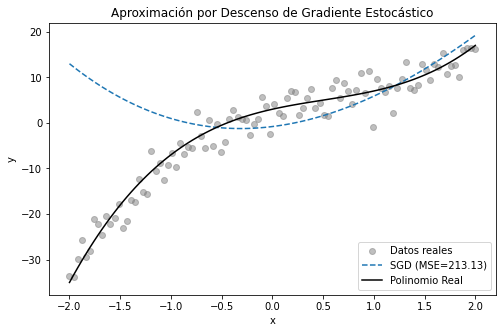

Tiempo de ejecución (s): 3.1763
Error cuadrático medio (MSE): 213.1255


In [8]:
def stochastic_gradient_descent(x, y, theta, learning_rate, num_epochs):
    theta_sgd = np.copy(theta)
    start_time = time.time()
    for epoch in range(num_epochs):
        for i in range(len(x)):
            xi = x[i]
            yi = y[i]
            gradient = np.polyval(np.polyder(theta_sgd), xi) - yi
            theta_sgd -= learning_rate * gradient * np.array([3 * xi**2, 2 * xi, 1, 0])
    return theta_sgd, time.time() - start_time

theta_sgd, time_sgd = stochastic_gradient_descent(x_data, y_data, theta, learning_rate, num_epochs)

# Evaluación numérica del fitness (error cuadrático medio)
mse_sgd = np.mean((np.polyval(theta_sgd, x_data) - y_data) ** 2)

# Gráficos
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label="Datos reales", color='gray', alpha=0.5)

x_fit = np.linspace(-2, 2, 100)
plt.plot(x_fit, np.polyval(theta_sgd, x_fit), label=f"SGD (MSE={mse_sgd:.2f})", linestyle='dashed')
plt.plot(x_fit, polynomial(x_fit), label="Polinomio Real", color='black')

plt.legend()
plt.title("Aproximación por Descenso de Gradiente Estocástico")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f"Tiempo de ejecución (s): {time_sgd:.4f}")
print(f"Error cuadrático medio (MSE): {mse_sgd:.4f}")


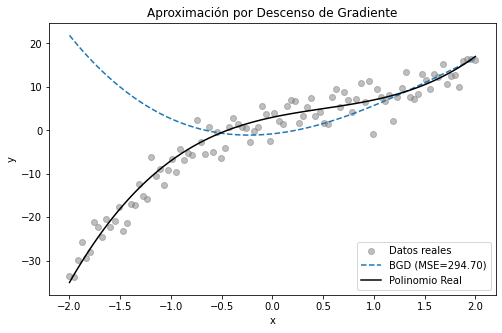

Tiempo de ejecución (s): 3.4648
Error cuadrático medio (MSE): 294.7026


In [9]:
def batch_gradient_descent(x, y, theta, learning_rate, num_epochs):
    theta_bgd = np.copy(theta)
    start_time = time.time()
    for epoch in range(num_epochs):
        gradient = np.mean([(np.polyval(np.polyder(theta_bgd), xi) - yi) * np.array([3 * xi**2, 2 * xi, 1, 0]) for xi, yi in zip(x, y)], axis=0)
        theta_bgd -= learning_rate * gradient
    return theta_bgd, time.time() - start_time

theta_bgd, time_bgd = batch_gradient_descent(x_data, y_data, theta, learning_rate, num_epochs)

# Evaluación numérica del fitness (error cuadrático medio)
mse_bgd = np.mean((np.polyval(theta_bgd, x_data) - y_data) ** 2)

# Gráficos
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label="Datos reales", color='gray', alpha=0.5)

x_fit = np.linspace(-2, 2, 100)
plt.plot(x_fit, np.polyval(theta_bgd, x_fit), label=f"BGD (MSE={mse_bgd:.2f})", linestyle='dashed')
plt.plot(x_fit, polynomial(x_fit), label="Polinomio Real", color='black')

plt.legend()
plt.title("Aproximación por Descenso de Gradiente")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f"Tiempo de ejecución (s): {time_bgd:.4f}")
print(f"Error cuadrático medio (MSE): {mse_bgd:.4f}")


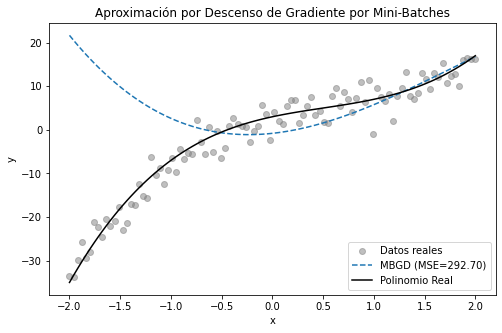

Tiempo de ejecución (s): 2.8715
Error cuadrático medio (MSE): 292.6966


In [10]:
def mini_batch_gradient_descent(x, y, theta, learning_rate, num_epochs, batch_size):
    theta_mbgd = np.copy(theta)
    start_time = time.time()
    for epoch in range(num_epochs):
        indices = np.random.permutation(len(x))
        for i in range(0, len(x), batch_size):
            batch_indices = indices[i:i+batch_size]
            x_batch = x[batch_indices]
            y_batch = y[batch_indices]
            gradient = np.mean([(np.polyval(np.polyder(theta_mbgd), xi) - yi) * np.array([3 * xi**2, 2 * xi, 1, 0]) for xi, yi in zip(x_batch, y_batch)], axis=0)
            theta_mbgd -= learning_rate * gradient
    return theta_mbgd, time.time() - start_time

theta_mbgd, time_mbgd = mini_batch_gradient_descent(x_data, y_data, theta, learning_rate, num_epochs, batch_size)

# Evaluación numérica del fitness (error cuadrático medio)
mse_mbgd = np.mean((np.polyval(theta_mbgd, x_data) - y_data) ** 2)

plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label="Datos reales", color='gray', alpha=0.5)

x_fit = np.linspace(-2, 2, 100)
plt.plot(x_fit, np.polyval(theta_mbgd, x_fit), label=f"MBGD (MSE={mse_mbgd:.2f})", linestyle='dashed')
plt.plot(x_fit, polynomial(x_fit), label="Polinomio Real", color='black')

plt.legend()
plt.title("Aproximación por Descenso de Gradiente por Mini-Batches")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f"Tiempo de ejecución (s): {time_mbgd:.4f}")
print(f"Error cuadrático medio (MSE): {mse_mbgd:.4f}")
